In [141]:
import pandas as pd
import textblob
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk.data
import numpy as np
from pandas import Series, DataFrame
import fnmatch
%matplotlib inline

In [35]:
feb1 = pd.read_csv("0201.csv",encoding = 'utf-8')
feb2 = pd.read_csv("0202.csv",encoding = 'utf-8')
feb3 = pd.read_csv("0203.csv",encoding = 'utf-8')
feb4 = pd.read_csv("0204.csv",encoding = 'utf-8')
feb5 = pd.read_csv("0205.csv",encoding = 'utf-8')

In [181]:
stop = stopwords.words('english')
def WordProcess(series):
    """This function will remove stopwords  in each row in a given series and return a list"""
    tokenized = []
    tokenizer = RegexpTokenizer(r'\w+')
    for i in range(len(series)):
        tokenized.append(tokenizer.tokenize(series[i]))
    tokenized_rmstop = []
    for i in range(len(tokenized)):
        lists = []
        for j in range(len(tokenized[i])):
            if tokenized[i][j] not in stop:
                lists.append(tokenized[i][j])
        tokenized_rmstop.append(lists)
    non_tokenized = []
    for i in range(len(tokenized_rmstop)):
        string = ' '.join(tokenized_rmstop[i])
        non_tokenized.append(string)
   
    for i in range(len(non_tokenized)):
        non_tokenized[i] = non_tokenized[i].lower()
    return non_tokenized

In [182]:
feb1comments = WordProcess(feb1['text'])
feb2comments = WordProcess(feb2['text'])
feb3comments = WordProcess(feb3['text'])
feb4comments = WordProcess(feb4['text'])
feb5comments = WordProcess(feb5['text'])

In [184]:
comments = [feb1comments, feb2comments, feb3comments, feb4comments, feb5comments]
sentiment_scores = []
subjectivity_scores = []
for i in range(len(comments)):
    day_score_sent = []
    day_score_sub = []
    for j in range(len(comments[i])):
        comment_text = TextBlob(comments[i][j])
        comment_score = comment_text.sentiment.polarity
        comment_sub = comment_text.sentiment.subjectivity
        day_score_sent.append(comment_score)
        day_score_sub.append(comment_sub)
    sum_day_scores = sum(day_score_sent)
    sum_day_sub = sum(day_score_sub)
    sentiment_scores.append(sum_day_scores)
    subjectivity_scores.append(sum_day_sub)

Sentiment polarity scores and subjectivity scores over the last five days, sentiment scores are from -0.1 to 0.1, so for 10,000 comments, most positive sentiment would be 10000 and most negative will be -10000. Subjectivity scores are from 0 to 1, with 0 being most objective and 1 being most subjective. We would expect a subjective day to have scores more than 5000.

In [185]:
#let's exclude neutral and only keep comments with polarity > 0.3 or < -0.3
sent = []
for i in range(len(comments)):
    day_score_sent = []
    day_score_sub = []
    for j in range(len(comments[i])):
        comment_text = TextBlob(comments[i][j])
        comment_score = comment_text.sentiment.polarity
        if comment_score > 0.3 or comment_score < -0.3:
            day_score_sent.append(comment_score)
    sum_day_scores = sum(day_score_sent)
    sent.append(sum_day_scores)
#now let's only keep extreme comments
sent_extreme = []
for i in range(len(comments)):
    day_score_sent = []
    day_score_sub = []
    for j in range(len(comments[i])):
        comment_text = TextBlob(comments[i][j])
        comment_score = comment_text.sentiment.polarity
        if comment_score > 0.5 or comment_score < -0.5:
            day_score_sent.append(comment_score)
    sum_day_scores = sum(day_score_sent)
    sent_extreme.append(sum_day_scores)

In [186]:
col = ['Sentiment','Non-Neutral Comments','Extreme Comments', 'Subjectivity']
col_lists = [sentiment_scores,sent,sent_extreme,subjectivity_scores]
ind = ['Feb 1', 'Feb 2', 'Feb 3','Feb 4','Feb 5']
df_sent = pd.DataFrame(index=ind, columns=col)
for i in range(len(col)):
    df_sent[col[i]] = col_lists[i]
df_sent

,Sentiment,Non-Neutral Comments,Extreme Comments,Subjectivity
Feb 1,3688.055375,3520.836941,1388.611111,5445.987193
Feb 2,2805.438312,2583.809524,473.888889,4727.976190
Feb 3,3101.304563,2614.047619,767.500000,4721.531836
Feb 4,2943.155664,2591.212121,560.000000,4568.584957
Feb 5,2398.888889,2290.000000,1290.833333,5495.833333


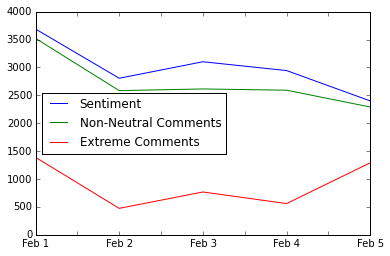

In [187]:
df_sent.plot(x=df_sent.index, y = df_sent.columns[:-1], kind='line')

I'm going to try tokenizing and see if it helps with sentiment

In [189]:
def WordProcess_tok(series):
    """This function will remove stopwords  in each row in a given series and return a list"""
    tokenized = []
    tokenizer = RegexpTokenizer(r'\w+')
    for i in range(len(series)):
        tokenized.append(tokenizer.tokenize(series[i]))
    tokenized_rmstop = []
    for i in range(len(tokenized)):
        lists = []
        for j in range(len(tokenized[i])):
            if tokenized[i][j] not in stop:
                lists.append(tokenized[i][j])
        tokenized_rmstop.append(lists)
    for i in range(len(tokenized_rmstop)):
        tokenized_rmstop[i] = [word.lower() for word in tokenized_rmstop[i]]
    return tokenized_rmstop

In [190]:
feb1comm = WordProcess_tok(feb1['text'])
feb2comm = WordProcess_tok(feb2['text'])
feb3comm = WordProcess_tok(feb3['text'])
feb4comm = WordProcess_tok(feb4['text'])
feb5comm = WordProcess_tok(feb5['text'])

In [191]:
tokcom = [feb1comm,feb2comm,feb3comm,feb4comm,feb5comm]
sent_score = []
for i in range(len(tokcom)):
    each_word = []
    for j in range(len(tokcom[i])):
            for k in range(len(tokcom[i][j])):
                word_text = TextBlob(tokcom[i][j][k])
                word_score = word_text.sentiment.polarity
                each_word.append(word_score)
    sum_day_score = sum(each_word)
    sent_score.append(sum_day_score)

In [192]:
sent_score

[6447.586580087599,
 4725.362554112368,
 4972.191558441603,
 4680.313852813671,
 4266.666666666127]

How many tokens are in each day?

In [193]:
count_token = []
for i in range(len(tokcom)):
    count = 0
    for j in range(len(tokcom[i])):
        count += len(tokcom[i][j])
    count_token.append(count)
count_token

[130700, 118600, 127200, 123000, 131300]

Scaling sentiment to 0 to 1, with 0 being lowest and 1 being highest.

In [194]:
avg_sent = []
for i in range(len(count_token)):
    avg = (sent_score[i]+count_token[i])/(count_token[i]*2)
    avg_sent.append(avg)
avg_sent

[0.5246655951801362,
 0.519921427293897,
 0.5195447781385284,
 0.5190256660683483,
 0.5162477786240142]

Sentiment is surely dropping every day. But without reference to how sentiment was before the PR scandal, and how positive tweets are in general , we don't know if the sentiments were relatively less positive than other topics. Perhaps Yuwen can grab random tweets from the web for reference.

In [195]:
#let's remove the word fine from all the comments as that might be artifically driving the sentiment score up
remove_fine = comments
for i in range(len(remove_fine)):
    for j in range(len(remove_fine[i])):
        if 'fine' in remove_fine[i][j]:
            remove_fine[i][j] = remove_fine[i][j].replace('fine', 'some')
sent_scores_fine = []
for i in range(len(remove_fine)):
    day_score_sent = []
    for j in range(len(remove_fine[i])):
        comment_text = TextBlob(remove_fine[i][j])
        comment_score = comment_text.sentiment.polarity
        day_score_sent.append(comment_score)
    sum_day_scores = sum(day_score_sent)
    sent_scores_fine.append(sum_day_scores)           

In [197]:
#let's exclude neutral and only keep comments with polarity > 0.3 or < -0.3
sent_fine = []
for i in range(len(remove_fine)):
    day_score_sent = []
    day_score_sub = []
    for j in range(len(remove_fine[i])):
        comment_text = TextBlob(remove_fine[i][j])
        comment_score = comment_text.sentiment.polarity
        if comment_score > 0.3 or comment_score < -0.3:
            day_score_sent.append(comment_score)
    sum_day_scores = sum(day_score_sent)
    sent_fine.append(sum_day_scores)
#now let's only keep extreme comments
sent_extreme_fine = []
for i in range(len(remove_fine)):
    day_score_sent = []
    day_score_sub = []
    for j in range(len(remove_fine[i])):
        comment_text = TextBlob(remove_fine[i][j])
        comment_score = comment_text.sentiment.polarity
        if comment_score > 0.5 or comment_score < -0.5:
            day_score_sent.append(comment_score)
    sum_day_scores = sum(day_score_sent)
    sent_extreme_fine.append(sum_day_scores)

In [198]:
col = ['Sentiment','Non-Neutral Comments','Extreme Comments']
col_lists = [sent_scores_fine,sent_fine,sent_extreme_fine]
ind = ['Feb 1', 'Feb 2', 'Feb 3','Feb 4','Feb 5']
df_sent_fine = pd.DataFrame(index=ind, columns=col)
for i in range(len(col)):
    df_sent_fine[col[i]] = col_lists[i]
df_sent_fine

,Sentiment,Non-Neutral Comments,Extreme Comments
Feb 1,1816.608947,1587.922078,1520.0
Feb 2,675.319264,604.285714,450.0
Feb 3,952.754329,701.785714,747.5
Feb 4,749.702381,670.000000,460.0
Feb 5,905.972222,904.166667,737.5


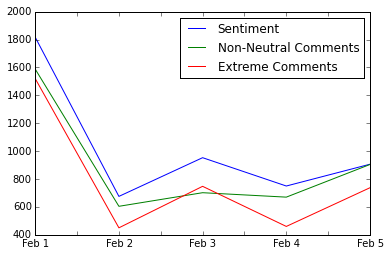

In [199]:
df_sent_fine.plot(x=df_sent_fine.index, y = df_sent_fine.columns, kind='line')

let's try the same thing, just with tokenized comments. 

In [200]:
rem_fine = tokcom
for i in range(len(rem_fine)):
    for j in range(len(rem_fine[i])):
        for k in range(len(rem_fine[i][j])):
            if 'fine' in rem_fine[i][j][k]:
                rem_fine[i][j][k] = rem_fine[i][j][k].replace('fine', 'some')

In [201]:
sent_score_fine = []
for i in range(len(rem_fine)):
    each_word = []
    for j in range(len(rem_fine[i])):
            for k in range(len(rem_fine[i][j])):
                word_text = TextBlob(rem_fine[i][j][k])
                word_score = word_text.sentiment.polarity
                each_word.append(word_score)
    sum_day_score = sum(each_word)
    sent_score_fine.append(sum_day_score)
sent_score_fine

[2447.5865800864444,
 1225.3625541125748,
 1013.8582251082663,
 846.9805194805429,
 808.3333333333813]

In [202]:
avg_sent = []
for i in range(len(count_token)):
    avg = (sent_score_fine[i]+count_token[i])/(count_token[i]*2)
    avg_sent.append(avg)
avg_sent

[0.5093633763584026,
 0.5051659466868152,
 0.5039852917653627,
 0.5034430102417908,
 0.5030781924346283]

Out of 10k comments per day, how many times did the word "unsub" (or unsubscribe) appear in there?

In [203]:
unsub_amount = []
for i in range(len(tokcom)):
    each_day_unsub = []
    for j in range(len(tokcom[i])):
        filtered = fnmatch.filter(tokcom[i][j], 'unsub*')
        num = len(filtered)
        each_day_unsub.append(num)
    unsub_amount.append(sum(each_day_unsub))    

In [204]:
unsub_amount

[300, 0, 800, 200, 400]

add in other terms, we can safely assume that if people are talking about the word "subscribe", they must be saying stuff like 'losing subscribers' or 'subscribers fading away' (these are examples from some of the tweets I read)

In [205]:
about_sub = []
for i in range(len(tokcom)):
    each_day_unsub = []
    for j in range(len(tokcom[i])):
        filtered = fnmatch.filter(tokcom[i][j], 'subscrib*')
        num = len(filtered)
        each_day_unsub.append(num)
    about_sub.append(sum(each_day_unsub)) 
about_sub

[800, 100, 1200, 200, 400]

In [206]:
# add unsub with sub topics
for i in range(len(unsub_amount)):
    unsub_amount[i] = unsub_amount[i]+about_sub[i]
unsub_amount

[1100, 100, 2000, 400, 800]

let's see how many times do words like 'upset', 'mad', and 'angry' appear

In [209]:
emotion =['upset*', 'mad*', 'angry*', 'furious*', 'anger*', 'fury*']
mad_tweets = []
for i in range(len(tokcom)):
    each_day_mad = []
    for j in range(len(tokcom[i])):
        for emo in emotion:
            filtered = fnmatch.filter(tokcom[i][j], emo)
            num = len(filtered)
            each_day_mad.append(num)
    mad_tweets.append(sum(each_day_mad))
mad_tweets                 

[500, 100, 200, 100, 200]

In [116]:
#let's do word frequency
whole_thing = []
for i in range(len(tokcom)):
    thing = sum(tokcom[i],[])
    whole_thing.append(thing)

In [159]:
entire = sum(whole_thing,[])
words = set(entire)
counts = [(w,entire.count(w)) for w in words]

In [168]:
df_count = pd.DataFrame(counts)
df_count = df_count.rename(columns={0: 'Word', 1: 'Frequency'}) 
df_count = df_count.sort_index(by='Frequency', ascending=False)
mask = df_count['Frequency'] > 1000 
mask2 = df_count['Frequency'] < 2500
df_count[mask][mask2]

,Word,Frequency
71,want,2400
448,Why,2400
437,stream,2200
626,Division,2200
770,Dansgaming,2100
628,pay,2100
841,REACTS,1700
281,News,1700
279,Reacts,1600
761,RAPPER,1600


no conclusion from word frequency

In [122]:
fine ='some'
fin = TextBlob(fine)
fin.sentiment.polarity

0.0

['the']